<a href="https://colab.research.google.com/github/aruna09/Review-Topic-Polarity-Classification/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Dataset from the Drive ⚙

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the required packages and libraries 🙋‍♀️

In [ ]:
pip install nlpaug

In [4]:
pip install nltk

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import matplotlib.ticker as ticker
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
sns.set()

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

### Loading the Train and Test set

In [5]:
path = "/content/drive/My Drive/Ugam-HiringChallenge/Data"
os.chdir(path)

In [ ]:
train = pd.read_csv('train.csv',error_bad_lines=False)
test = pd.read_csv('test.csv',error_bad_lines=False)
submission = pd.read_csv('submission.csv',error_bad_lines=False)

data = train

In [7]:
data.head()

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1


### Visualization 📊✨

In [8]:
def plot_column_class_distribution(dataframe, columns):
  i = 0
  fig, ax = plt.subplots(1, 2, figsize=(13,4))

  for column in columns:
    x = dataframe[column].value_counts()
    sns.barplot(x = x.index, y = x, ax = ax[i], ci=None)
    i += 1

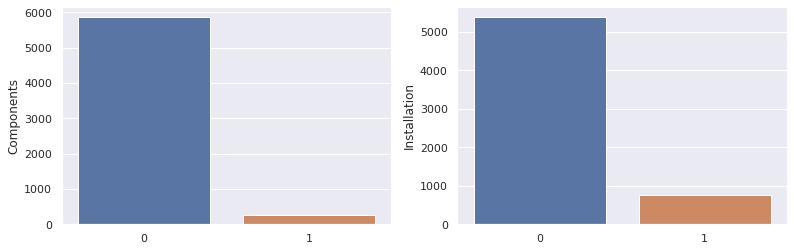

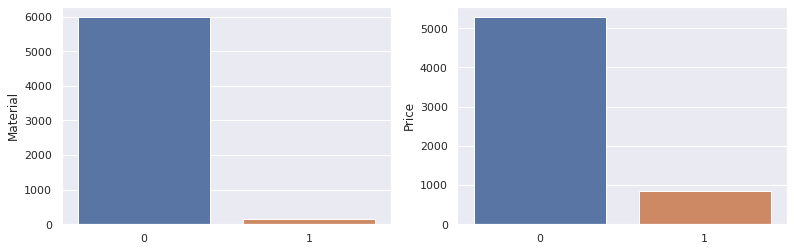

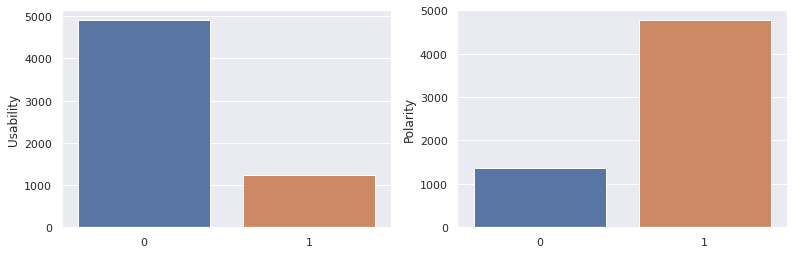

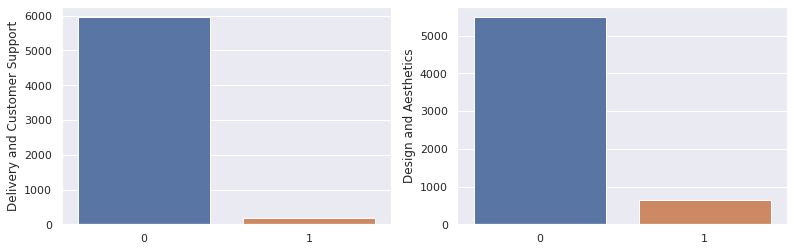

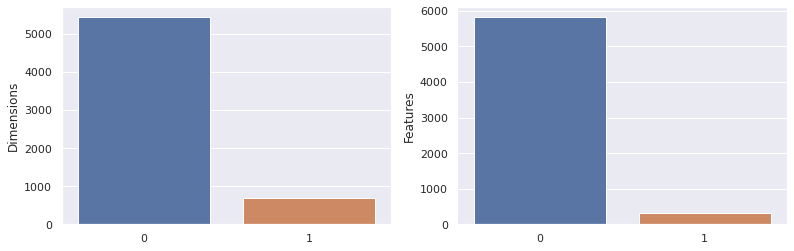

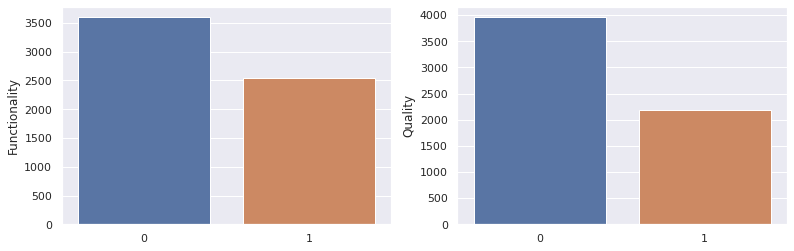

In [9]:
plot_column_class_distribution(data, ['Components', 'Installation'])
plot_column_class_distribution(data, ['Material', 'Price'])
plot_column_class_distribution(data, ['Usability', 'Polarity'])
plot_column_class_distribution(data, ['Delivery and Customer Support', 'Design and Aesthetics'])
plot_column_class_distribution(data, ['Dimensions', 'Features'])
plot_column_class_distribution(data, ['Functionality', 'Quality'])

### Dealing with Class Imbalance👩‍🏫👀
Reference: https://github.com/makcedward/nlpaug

1. From the visualizations its clear that most of the classes have an imbalanced spread of data.

2. In order to handel this, I came across a completely open source package: nlpaug(link above).

3. Approach:

Given a sentence, the number of words to replace and the number of new sentences to generate, this NLP Text Augmentation package helps us by generating synthetic data keeping in mind the considerations stated above.

4. An observation that I made, was that some of the text reviews were considerably long, which implies that more synthetic data can be generated from these.

5. With that in mind, I made the following assumptions while creating this synthetic data:

-> the default number of non-stop words to replace = 3

-> the default number of new sentences generated = 3

-> if the number of words in a review > 25, the sentence is considered long, and the number of non-stop words that can be replaced = 7

-> similarly, the total number of new sentences that can be generated is also increased to 7


In [84]:
import nlpaug
import nlpaug.augmenter.word as naw
from random import shuffle

def generate_new_data(dataframe, column_name):

  # default aug_max and n
  df = dataframe[dataframe[column_name] == 1]

  aug_max_arg = 3
  n_arg = 3
  augmented_sentences_list = []

  # aug_max refers to the number of words to be replaced in a sentence
  aug = naw.SynonymAug(aug_src = 'wordnet', aug_max = aug_max_arg)
  temp_df = pd.DataFrame()

  #n refers to the number of new sentences to generate
  for row_no, row_content in df.iterrows():
    id = row_content['Id']
    review = row_content['Review']
    polarity = row_content['Polarity']
    components = row_content['Components']
    dimensions = row_content['Dimensions']
    features = row_content['Features']
    functionality = row_content['Functionality']
    installation = row_content['Installation']
    material = row_content['Material']
    price = row_content['Price']
    quality = row_content['Quality']
    usability = row_content['Usability']
    delivery_and_customer_support = row_content['Delivery and Customer Support']
    design_and_aesthetics = row_content['Design and Aesthetics']

    # if the number of words in the review is more than 25 then its a long sentence and can generate more augumented sentences
    
    if len(review.split(" ")) > 25:
      aug_max_arg = 7
      n_arg = 7

    augmented_sentences_list = aug.augment(review, n=n_arg)
   
    for sentence in augmented_sentences_list:
      new_df = pd.DataFrame({'Id': id ,
                            'Review': sentence,
                            'Components': components,
                            'Delivery and Customer Support': delivery_and_customer_support,
                            'Design and Aesthetics': design_and_aesthetics,
                            'Dimensions': dimensions,
                            'Features': features,
                            'Functionality': functionality,
                            'Installation': installation,
                            'Material': material,
                            'Price': price,
                            'Quality': quality,
                            'Usability': usability,
                            'Polarity': polarity
                          }, index = [0])
      temp_df = temp_df.append(new_df)

  dataframe = dataframe.append(temp_df)
  return dataframe

In [ ]:
columns_with_class_imbalance = ['Components', 'Delivery and Customer Support', 'Design and Aesthetics', 'Dimensions', 'Features',
                                 'Installation', 'Material', 'Price', 'Usability']

for column in columns_with_class_imbalance:
  print("Column being Processed: " + column)
  data = generate_new_data(data, column)

In [ ]:
plot_column_class_distribution(data, ['Components', 'Installation'])
plot_column_class_distribution(data, ['Material', 'Price'])
plot_column_class_distribution(data, ['Usability', 'Polarity'])
plot_column_class_distribution(data, ['Delivery and Customer Support', 'Design and Aesthetics'])
plot_column_class_distribution(data, ['Dimensions', 'Features'])
plot_column_class_distribution(data, ['Functionality', 'Quality'])

### Predicting Polarity using TextBlob

In [108]:
! pip install textblob
from textblob import TextBlob

In [109]:
test['Polarity'] = test['Review'].apply(lambda x: (TextBlob(x).sentiment.polarity))

test.loc[round(test['Polarity'], 2) > 0, 'Polarity'] = 1
test.loc[round(test['Polarity'], 2) == 0, 'Polarity'] = 1

test.loc[round(test['Polarity'], 2) < 0.20, 'Polarity'] = 0

### Predicting Topic Class

in the preprocess_text function, everything is removed except capital and small English letters, which results in single characters that make no sense. For instance, when you remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s".

Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

### Expanding Contractions

In [13]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
def general_preprocessing(sen):

    # decontracting words
    sentence = decontracted(sen)

    # removing stop words
    sentence = " ".join([word for word in str(sentence).split() if word not in stop_words])

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # converting to lower case
    sentence = sentence.lower()

    # Extracting the Lemma
    sentence = " ".join([lemmatizer.lemmatize(word) for word in sentence.split()])

    return sentence

In [100]:
def preprocess_data(dataframe):
  preprocessed_text = []
  sentences = list(dataframe['Review'])
  for sentence in sentences:
      preprocessed_text.append(general_preprocessing(sentence))
  return preprocessed_text

In [101]:
data['Review'] = preprocess_data(data)
test_x = preprocess_data(test)

In [102]:
data_temp = data
test_temp = test

### Splitting the dataset into Train and Test sets

In [25]:
def split_train_test_sets(dataset, target_column_name):
  return train_test_split(dataset['Review'], dataset[target_column_name], test_size=0.20, random_state=42)

In [18]:
def fit_tokenizer_on_train_set(dataset):
  tokenizer = Tokenizer(num_words=5000)
  tokenizer.fit_on_texts(dataset)
  return tokenizer

### Preping the Embedding Layer

In [60]:
def convert_to_numerical_vectors(dataset, tokenizer):
  dataset = tokenizer.texts_to_sequences(dataset)
  dataset = pad_sequences(dataset, padding='post', maxlen=maxlen)
  return dataset

In [87]:
def construct_embeddings_layer(maxlen, vocab_size, tokenizer):
  embeddings_dictionary = dict()
  path = "glove.6B.100d.txt"

  glove_file = open(path, encoding="utf8")

  for line in glove_file:
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary [word] = vector_dimensions
  glove_file.close()

  embedding_matrix = zeros((vocab_size, 100))
  for word, index in tokenizer.word_index.items():
      embedding_vector = embeddings_dictionary.get(word)
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector

  model = Sequential()
  embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
  model.add(embedding_layer)

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  return model

### First Model: Neural Net

In [21]:
def construct_neural_net(vocab_size, embedding_matrix, maxlen):
  model = Sequential()
  embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
  model.add(embedding_layer)
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  return model

In [71]:
def compile_and_train_model(model):
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  print(model.summary())
  history = model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)
  return model, history

In [96]:
data = data_temp
test = test_temp

In [103]:
scores = []
histories = []
maxlen = 100
test_columns = list(test)
del test_columns[0:2]


for column in test_columns:
  print(column)

  test_reviews = test_x
  X_train, X_test, y_train, y_test = split_train_test_sets(data, column)
  tokenizer = fit_tokenizer_on_train_set(X_train)

  # vocab_size defines the number of unique words=12409
  # Adding 1 because of reserved 0 index
  vocab_size = len(tokenizer.word_index) + 1

  X_train = convert_to_numerical_vectors(X_train, tokenizer)
  X_test = convert_to_numerical_vectors(X_test, tokenizer)
  test_reviews = convert_to_numerical_vectors(test_reviews, tokenizer)

  model = construct_embeddings_layer(maxlen, vocab_size, tokenizer)

  model, history = compile_and_train_model(model)
  test[column] = model.predict(test_reviews) 

  test.loc[round(test[column], 2) < 0.50, column] = 0
  test.loc[round(test[column], 2) > 0.50, column] = 1
  test.loc[round(test[column], 2) == 0.50, column] = 1

  score = model.evaluate(X_test, y_test, verbose=1)
  scores.append(score)
  histories.append(history)

Components
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_63 (Embedding)    (None, 100, 100)          610500    
                                                                 
 flatten_63 (Flatten)        (None, 10000)             0         
                                                                 
 dense_63 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 620,501
Trainable params: 10,001
Non-trainable params: 610,500
_________________________________________________________________
None
Epoch 1/30
31/31 [==============================] - 1s 8ms/step - loss: 0.3012 - acc: 0.9493 - val_loss: 0.2463 - val_acc: 0.9511
Epoch 2/30
31/31 [==============================] - 0s 4ms/step - loss: 0.1760 - acc: 0.9587 - val_loss: 0.2054 - val_acc: 0.9511
Epoch 3/30
31/31 [============

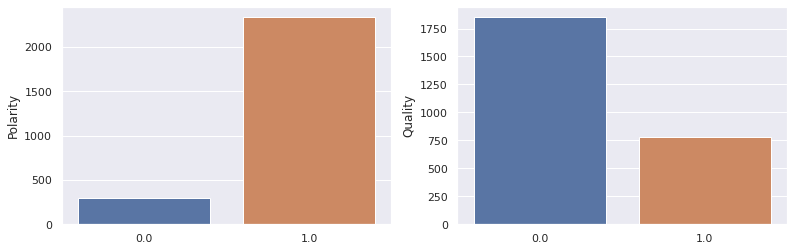

In [111]:
plot_column_class_distribution(test, ['Polarity', 'Quality'])

In [112]:
test.shape

(2631, 14)

### Create Submission CSV

In [117]:
test = test.drop(columns=['Id', 'Review'], axis=1)

In [118]:
#submission_csv = pd.DataFrame({'customer_id':test.customer_id, 'credit_card_default': y_test})
test.to_csv(path + 'submission_file.csv', index=False)

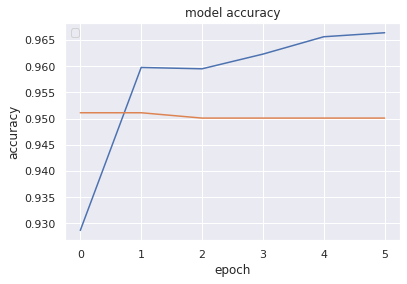

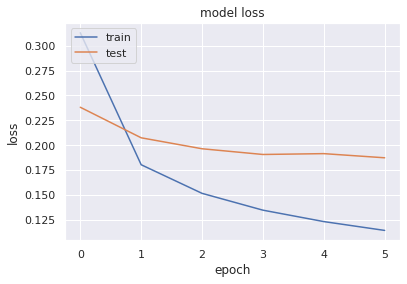

In [84]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### General Preprocessing

1. Convert to lowercase
2. Remove Punctuation
3. Remove Stopwords
4. Stemming/Lemmatization
5. Remove Numbers

In [33]:
def drop_duplicates():
  data.drop_duplicates(inplace=True)
  return data

In [34]:
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def general_preprocessing(text):
  text = text.str.lower()
  text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
  text = text.apply(lambda x: re.sub('W*dw*','',x))
  text = " ".join([word for word in str(text).split() if word not in stop_words])
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
  return text